In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/data_cryptos/DERIVATIVES_DECORATED_TRADE_20240416.csv')
print(df.tail())

          VEGA  OPENINTERESTCHANGE  PRETRADEBIDVOLUME  ISBUYSIDE  \
34045  0.00017             11000.0            15000.0       True   
34046  0.00017             11000.0            15000.0       True   
34047  0.00066                 0.0            15000.0       True   
34048  0.00021             15000.0            15000.0       True   
34049  0.00021             15000.0            15000.0       True   

       POSTTRADEMIDIV  PRETRADEMARKPRICE  INDEXPRICE               INSTRUMENT  \
34045         116.045             0.0336      0.4993  XRP_USDC-19APR24-0D48-C   
34046         104.075             0.0289      0.4843   XRP_USDC-19APR24-0D5-P   
34047         101.755             0.0676      0.4854  XRP_USDC-31MAY24-0D48-C   
34048         102.020             0.0041      0.4872   XRP_USDC-31MAY24-0D9-C   
34049          48.005             0.0041      0.4878   XRP_USDC-31MAY24-0D9-C   

       POSTTRADEBIDVOLUME    GAMMA  ...  POSTTRADEASKPRICE    TICKDIRECTION  \
34045             15000.0

In [3]:
print(df.info())
print("\nDescripción estadística:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34050 entries, 0 to 34049
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   VEGA                         34045 non-null  float64
 1   OPENINTERESTCHANGE           34035 non-null  float64
 2   PRETRADEBIDVOLUME            34045 non-null  float64
 3   ISBUYSIDE                    34050 non-null  bool   
 4   POSTTRADEMIDIV               34045 non-null  float64
 5   PRETRADEMARKPRICE            34045 non-null  float64
 6   INDEXPRICE                   34050 non-null  float64
 7   INSTRUMENT                   34050 non-null  object 
 8   POSTTRADEBIDVOLUME           34045 non-null  float64
 9   GAMMA                        34045 non-null  float64
 10  PRETRADEMIDPRICE             34000 non-null  float64
 11  PRETRADEOPENINTEREST         34035 non-null  float64
 12  CURRENCY                     34050 non-null  object 
 13  PRETRADEMIDIV   

In [4]:
print(df['PRETRADEMARKPRICE'].describe())

count    34045.000000
mean        14.149596
std        269.176385
min          0.000000
25%          0.004900
50%          0.016100
75%          0.044100
max      24439.828243
Name: PRETRADEMARKPRICE, dtype: float64


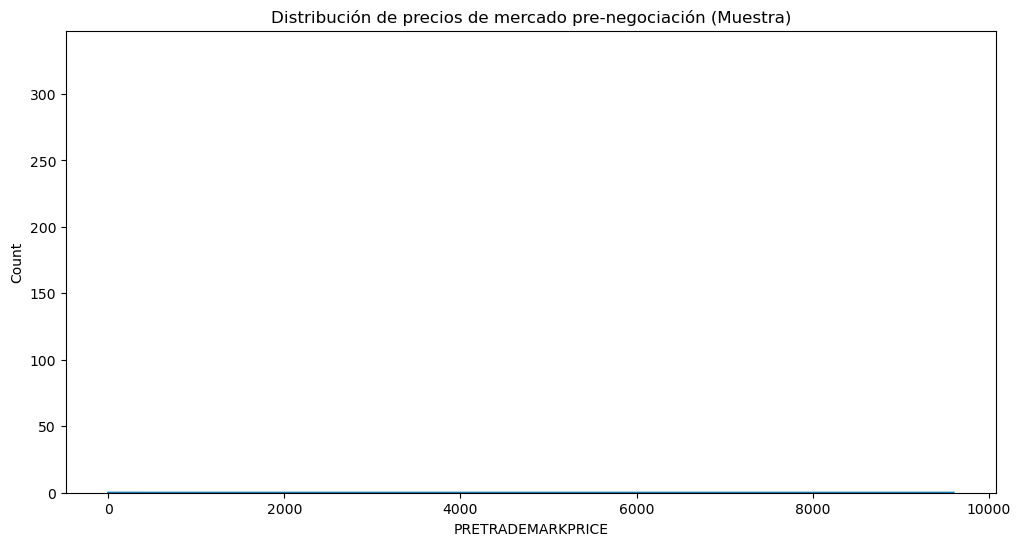

In [5]:
sample_df = df.sample(n=1000)  # Toma una muestra aleatoria de 1000 filas
plt.figure(figsize=(12,6))
sns.histplot(sample_df['PRETRADEMARKPRICE'], kde=True)
plt.title('Distribución de precios de mercado pre-negociación (Muestra)')
plt.show()

In [6]:
print("Valores mínimos:")
print(df['PRETRADEMARKPRICE'].nsmallest(10))
print("\nNúmero de valores <= 0:")
print((df['PRETRADEMARKPRICE'] <= 0).sum())

Valores mínimos:
2579    0.0
2581    0.0
3040    0.0
3560    0.0
3561    0.0
3562    0.0
3747    0.0
4444    0.0
4478    0.0
4479    0.0
Name: PRETRADEMARKPRICE, dtype: float64

Número de valores <= 0:
123


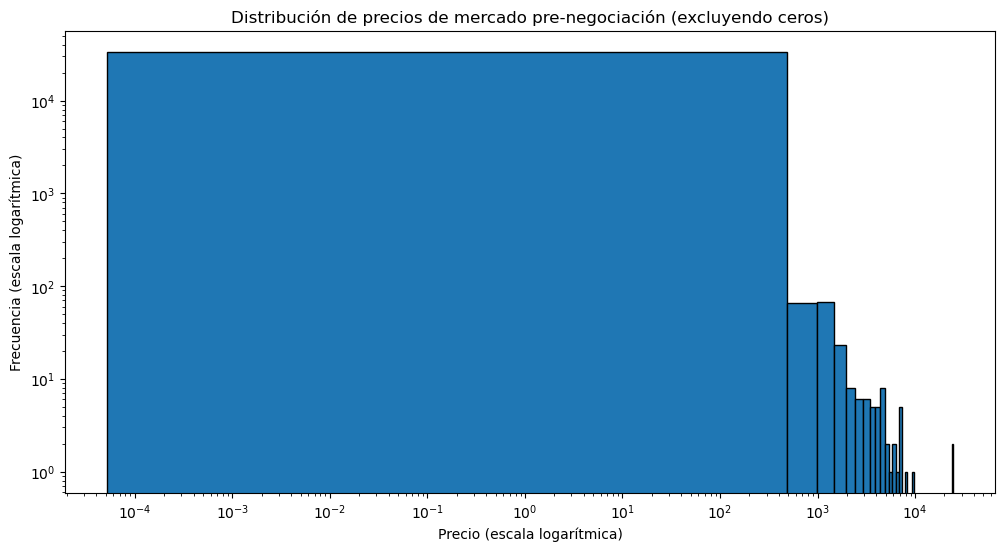

In [7]:
df_positive = df[df['PRETRADEMARKPRICE'] > 0]

plt.figure(figsize=(12,6))
plt.hist(df_positive['PRETRADEMARKPRICE'], bins=50, edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de precios de mercado pre-negociación (excluyendo ceros)')
plt.xlabel('Precio (escala logarítmica)')
plt.ylabel('Frecuencia (escala logarítmica)')
plt.show()

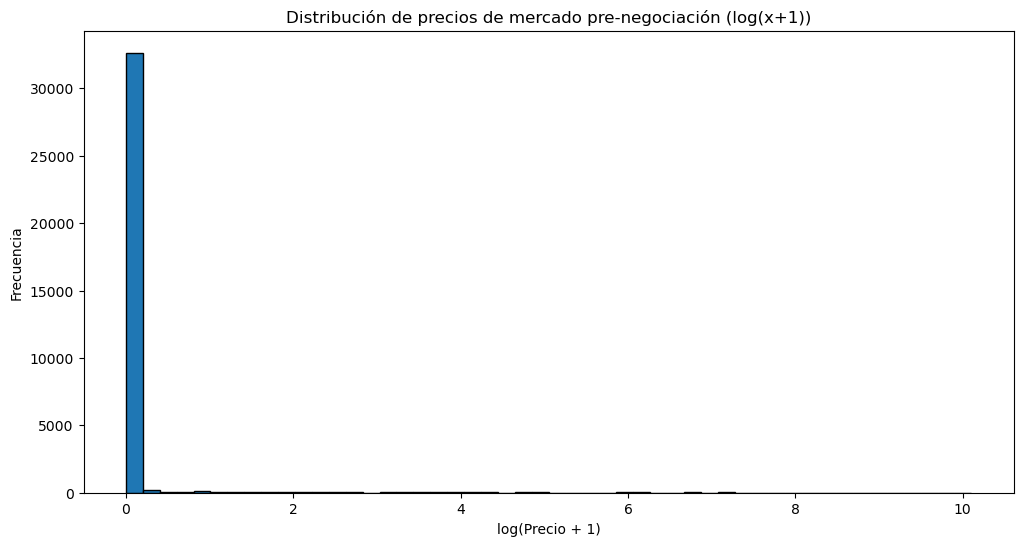

In [8]:
import numpy as np

def log_plus_one(x):
    return np.log1p(x)

plt.figure(figsize=(12,6))
plt.hist(log_plus_one(df['PRETRADEMARKPRICE']), bins=50, edgecolor='black')
plt.title('Distribución de precios de mercado pre-negociación (log(x+1))')
plt.xlabel('log(Precio + 1)')
plt.ylabel('Frecuencia')
plt.show()

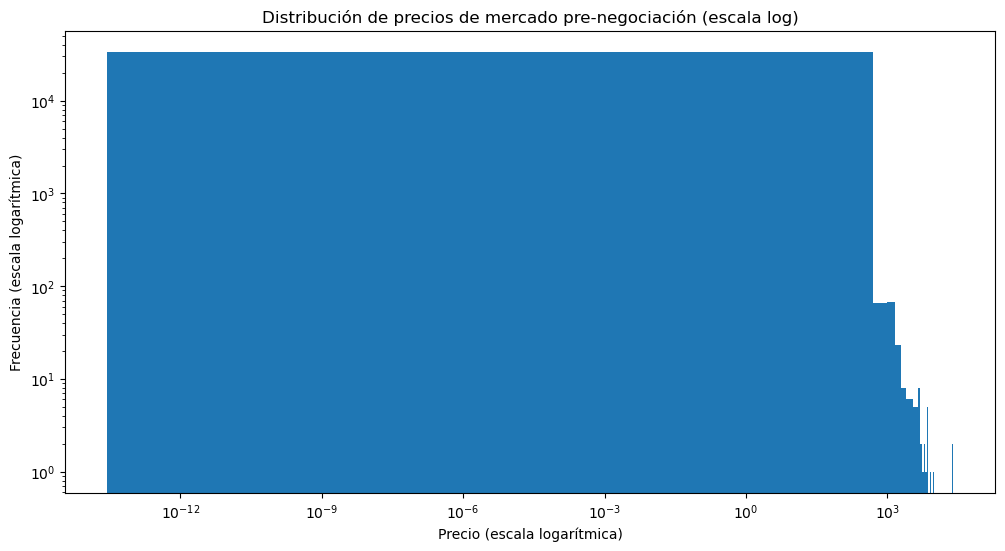

In [9]:
plt.figure(figsize=(12,6))
plt.hist(df['PRETRADEMARKPRICE'], bins=50, log=True)
plt.xscale('log')
plt.title('Distribución de precios de mercado pre-negociación (escala log)')
plt.xlabel('Precio (escala logarítmica)')
plt.ylabel('Frecuencia (escala logarítmica)')
plt.show()

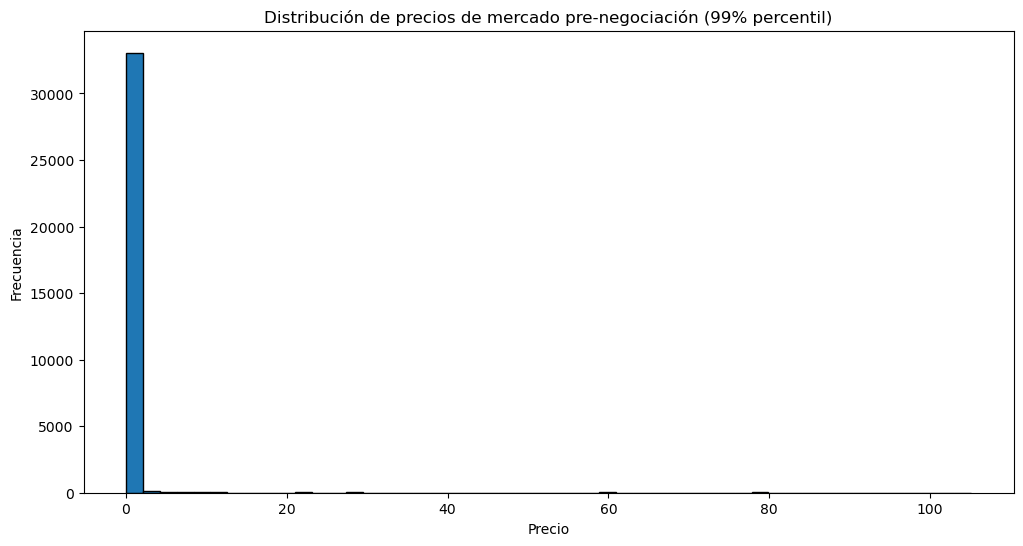

In [10]:
percentile_99 = df['PRETRADEMARKPRICE'].quantile(0.99)
df_filtered = df[df['PRETRADEMARKPRICE'] <= percentile_99]

plt.figure(figsize=(12,6))
plt.hist(df_filtered['PRETRADEMARKPRICE'], bins=50, edgecolor='black')
plt.title('Distribución de precios de mercado pre-negociación (99% percentil)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

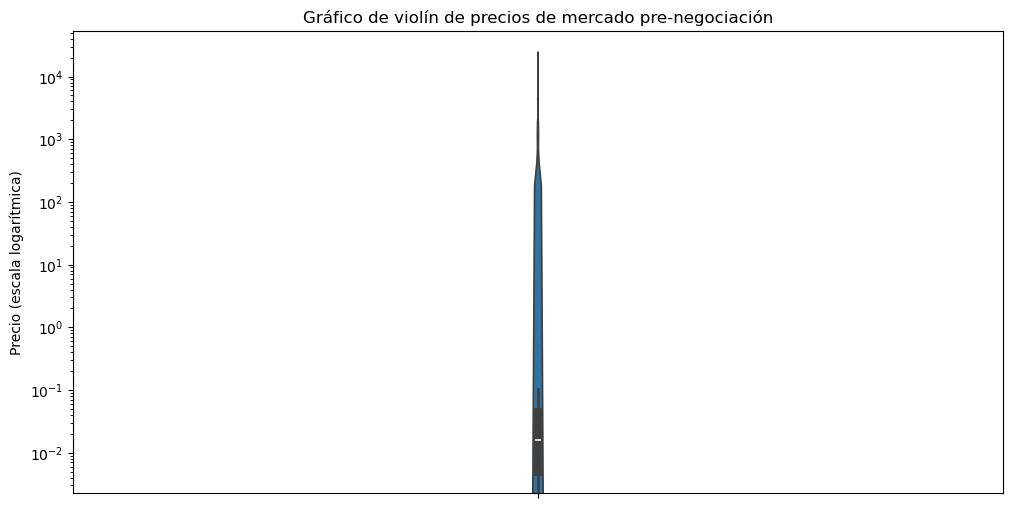

In [11]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.violinplot(y=df['PRETRADEMARKPRICE'])
plt.yscale('log')
plt.title('Gráfico de violín de precios de mercado pre-negociación')
plt.ylabel('Precio (escala logarítmica)')
plt.show()

In [12]:
import numpy as np

plt.figure(figsize=(12,6))
bins = np.logspace(np.log10(df['PRETRADEMARKPRICE'].min()), np.log10(df['PRETRADEMARKPRICE'].max()), 50)
plt.hist(df['PRETRADEMARKPRICE'], bins=bins, edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de precios de mercado pre-negociación (bins log)')
plt.xlabel('Precio (escala logarítmica)')
plt.ylabel('Frecuencia (escala logarítmica)')
plt.show()

/tmp/ipykernel_6852/883050412.py:4: RuntimeWarning: divide by zero encountered in log10
  bins = np.logspace(np.log10(df['PRETRADEMARKPRICE'].min()), np.log10(df['PRETRADEMARKPRICE'].max()), 50)
/home/antonio-tapia/anaconda3/lib/python3.12/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/antonio-tapia/anaconda3/lib/python3.12/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 1200x600 with 1 Axes>

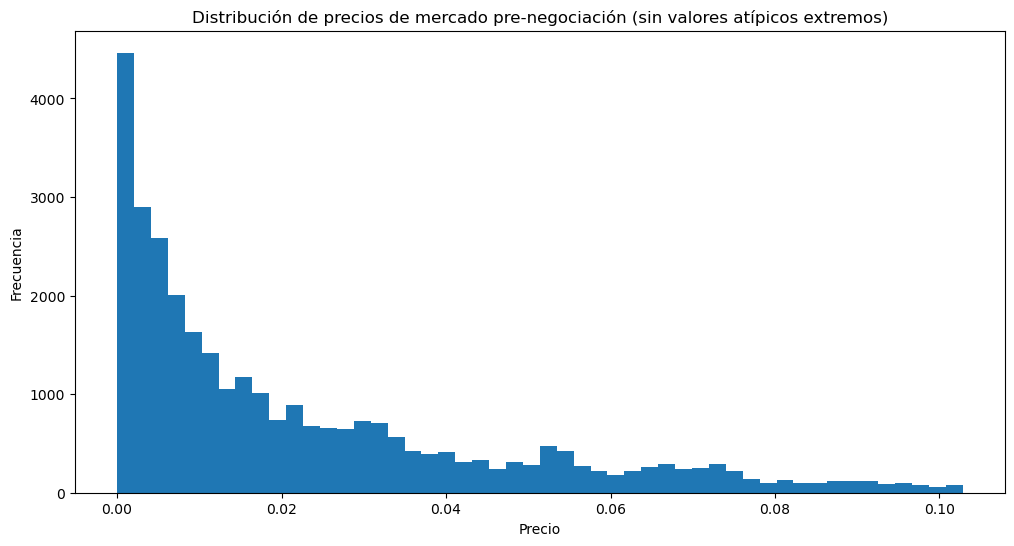

In [13]:
Q1 = df['PRETRADEMARKPRICE'].quantile(0.25)
Q3 = df['PRETRADEMARKPRICE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['PRETRADEMARKPRICE'] >= lower_bound) & (df['PRETRADEMARKPRICE'] <= upper_bound)]

plt.figure(figsize=(12,6))
plt.hist(filtered_df['PRETRADEMARKPRICE'], bins=50)
plt.title('Distribución de precios de mercado pre-negociación (sin valores atípicos extremos)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

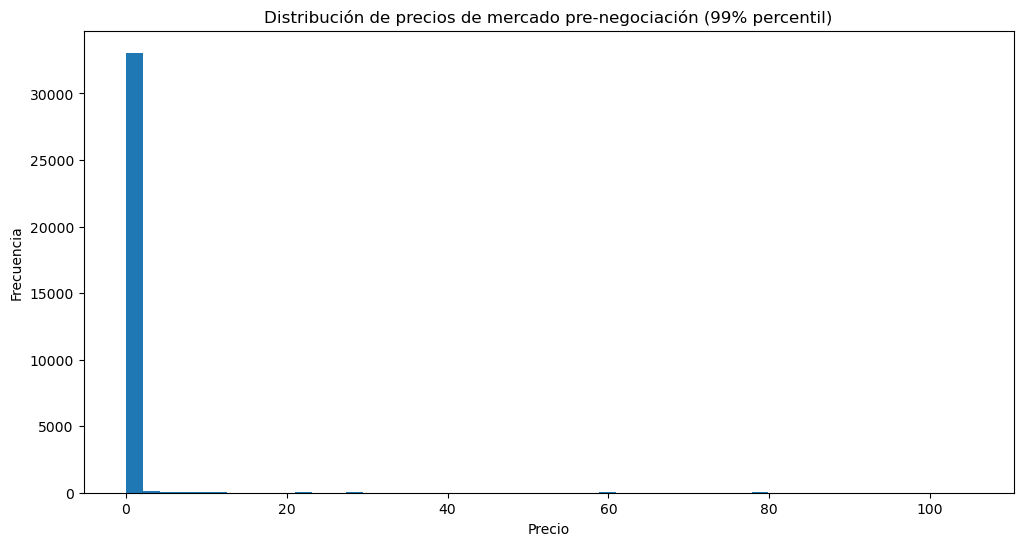

In [14]:
percentile_99 = df['PRETRADEMARKPRICE'].quantile(0.99)
filtered_df = df[df['PRETRADEMARKPRICE'] <= percentile_99]

plt.figure(figsize=(12,6))
plt.hist(filtered_df['PRETRADEMARKPRICE'], bins=50)
plt.title('Distribución de precios de mercado pre-negociación (99% percentil)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Nuevo intento



In [15]:
print(df['PRETRADEMARKPRICE'].isnull().sum())
print(df['PRETRADEMARKPRICE'].isin([float('inf'), float('-inf')]).sum())
print(df['PRETRADEMARKPRICE'].min())
print(df['PRETRADEMARKPRICE'].max())

5
0
0.0
24439.8282428


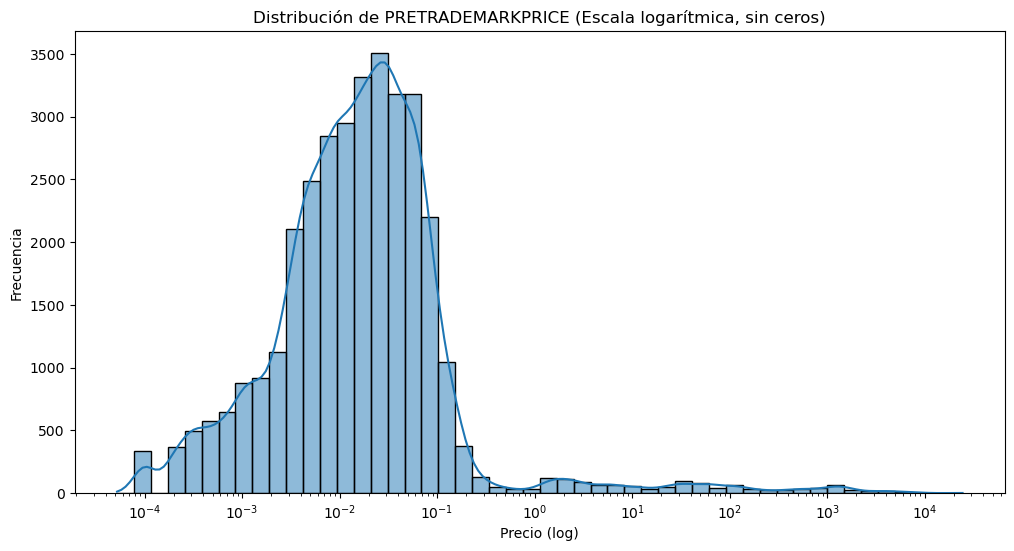

In [16]:
df_filtered = df[df['PRETRADEMARKPRICE'] > 0]

plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['PRETRADEMARKPRICE'], kde=True, bins=50, log_scale=True)
plt.title('Distribución de PRETRADEMARKPRICE (Escala logarítmica, sin ceros)')
plt.xlabel('Precio (log)')
plt.ylabel('Frecuencia')
plt.show()

Esta gráfica muestra la distribución de PRETRADEMARKPRICE (precio de mercado pre-negociación) en escala logarítmica, excluyendo los valores cero. Aquí están algunas observaciones clave:

Distribución: La distribución es aproximadamente log-normal, con una cola larga hacia la derecha.
Concentración de precios: La mayoría de los precios se concentran entre 10^-3 y 10^-1 (0.001 a 0.1), con un pico alrededor de 10^-2 (0.01).
Rango de precios: Los precios varían desde aproximadamente 10^-4 (0.0001) hasta 10^4 (10,000), abarcando un rango muy amplio de 8 órdenes de magnitud.
Asimetría: Hay una clara asimetría positiva, con una cola larga hacia precios más altos.
Valores extremos: Se observan algunos valores extremos en el lado derecho de la distribución, representando precios muy altos (por encima de 1000).
Bimodalidad: Hay una ligera indicación de bimodalidad, con un pico secundario más pequeño alrededor de 10^2 (100).

Esta distribución sugiere que el mercado de derivados de criptomonedas tiene una gran variedad de precios, con muchos contratos de bajo precio y algunos de precio muy alto. La forma log-normal es típica en mercados financieros y refleja la naturaleza multiplicativa de los retornos de precios.

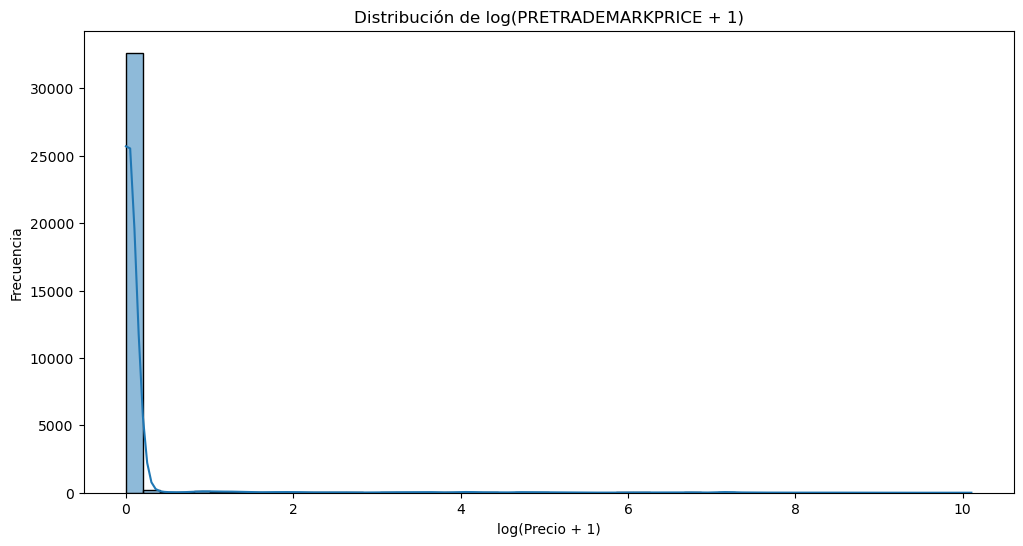

In [17]:
import numpy as np

plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(df['PRETRADEMARKPRICE']), kde=True, bins=50)
plt.title('Distribución de log(PRETRADEMARKPRICE + 1)')
plt.xlabel('log(Precio + 1)')
plt.ylabel('Frecuencia')
plt.show()

Concentración extrema: La gran mayoría de los valores se concentran cerca de cero en la escala logarítmica, lo que indica que hay una gran cantidad de precios muy bajos o ceros en los datos originales.
Distribución altamente sesgada: Hay una cola muy larga hacia la derecha, pero la mayor parte de la masa de la distribución está en el extremo izquierdo.
Rango de valores: El eje x va de 0 a 10, lo que en la escala original corresponde a precios que van desde 0 hasta aproximadamente 22,025 (e^10 - 1).
Pico pronunciado: Hay un pico muy agudo cerca de 0, lo que sugiere que muchos de los precios son muy cercanos a cero o exactamente cero.
Escasez de valores medios: Hay relativamente pocos valores en el rango medio de la distribución.
Valores extremos: Se observan algunos valores en el extremo derecho de la distribución, representando precios muy altos, pero son comparativamente raros.

Esta distribución sugiere varias cosas sobre el mercado de derivados de criptomonedas:

Hay una gran cantidad de contratos con precios muy bajos o sin valor (posiblemente opciones muy fuera del dinero).
Existe una amplia gama de precios, desde prácticamente cero hasta valores muy altos.
La distribución es extremadamente asimétrica, lo que es común en mercados financieros, especialmente en derivados.

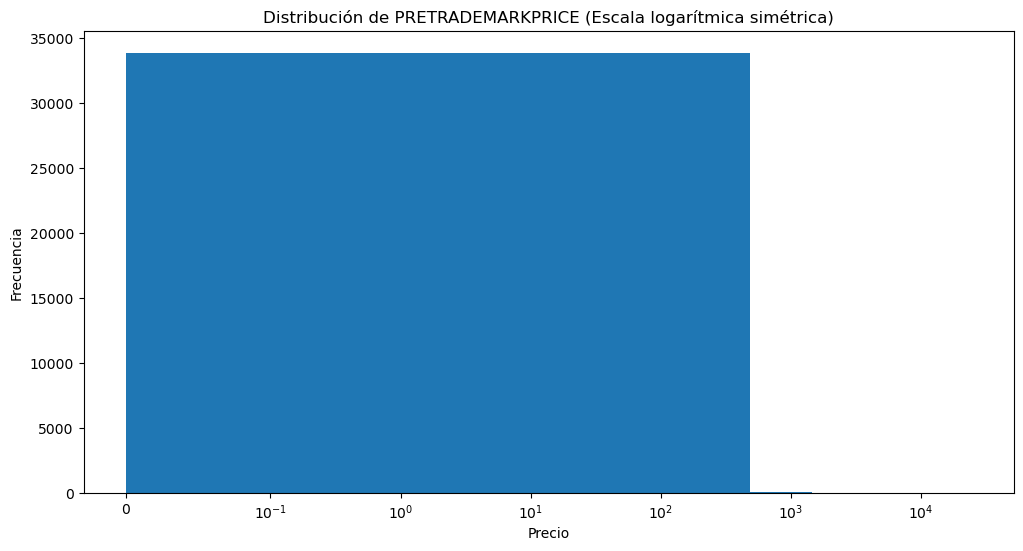

In [18]:
from matplotlib.scale import SymmetricalLogScale

plt.figure(figsize=(12, 6))
plt.hist(df['PRETRADEMARKPRICE'].dropna(), bins=50)
plt.xscale('symlog', linthresh=0.1)
plt.title('Distribución de PRETRADEMARKPRICE (Escala logarítmica simétrica)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Este gráfico muestra la distribución de PRETRADEMARKPRICE utilizando una escala logarítmica simétrica. Sin embargo, la visualización no es óptima para interpretar la distribución de los datos. Aquí están algunas observaciones y sugerencias:

Escala del eje x: La escala logarítmica simétrica permite incluir el valor cero y valores positivos en una escala logarítmica. El rango va desde 0 hasta 10^4.
Frecuencia: El eje y muestra la frecuencia, que llega hasta 35000.
Distribución no visible: La gráfica muestra un solo bloque azul sólido, lo que sugiere que la mayoría de los datos están concentrados en un rango muy estrecho de valores.
Falta de detalle: No se puede discernir la forma real de la distribución debido a la falta de detalle en la visualización.

Para mejorar la interpretación de estos datos, sugeriría:

Ajustar los bins: Aumentar el número de bins o ajustar su tamaño para revelar más detalles de la distribución.
Usar un gráfico de densidad: Un gráfico de densidad podría mostrar mejor la forma de la distribución.
Transformación de datos: Considerar una transformación diferente de los datos, como log(x+1), para manejar los valores cercanos a cero.
Gráficos separados: Crear gráficos separados para diferentes rangos de precios (por ejemplo, uno para precios bajos y otro para precios altos).
Análisis estadístico: Proporcionar estadísticas descriptivas (media, mediana, desviación estándar, etc.) para complementar la visualización.
Explorar outliers: Investigar los valores extremos que podrían estar afectando la visualización.
Segmentación: Dividir los datos por categorías (como tipo de opción o fecha de vencimiento) para ver si emergen patrones más claros.

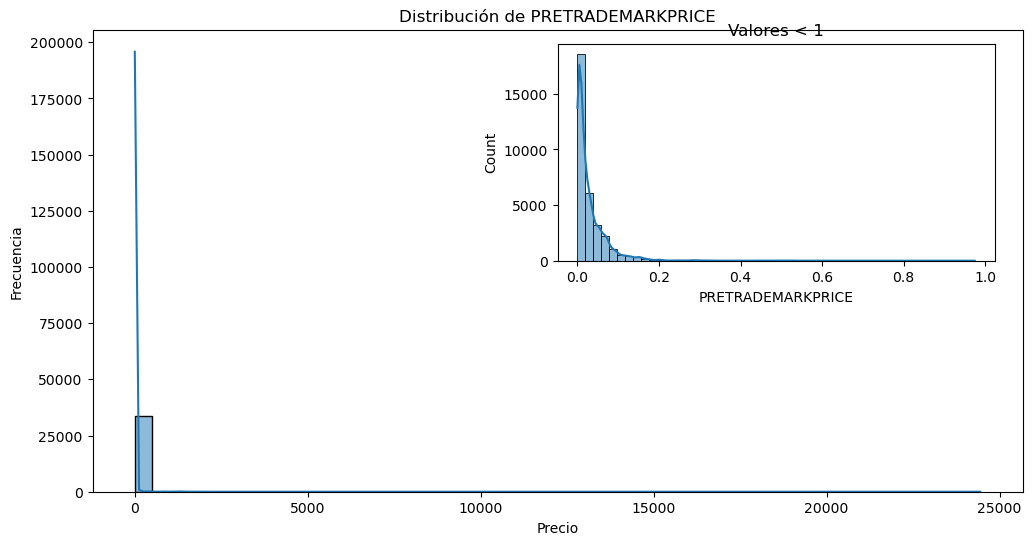

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df['PRETRADEMARKPRICE'].dropna(), kde=True, bins=50, ax=ax)
ax.set_title('Distribución de PRETRADEMARKPRICE')
ax.set_xlabel('Precio')
ax.set_ylabel('Frecuencia')

# Crear un inset para los valores más pequeños
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
sns.histplot(df[df['PRETRADEMARKPRICE'] < 1]['PRETRADEMARKPRICE'].dropna(), kde=True, bins=50, ax=axins)
axins.set_title('Valores < 1')

plt.show()

Distribución altamente sesgada: La gran mayoría de los precios se concentran cerca de cero, como se muestra en el pico extremadamente alto en el lado izquierdo del gráfico principal.
Rango amplio de precios: El eje x se extiende hasta 25000, indicando que hay algunos instrumentos con precios muy altos, aunque son relativamente pocos.
Valores menores a 1: El gráfico insertado (inset) muestra en detalle la distribución de precios menores a 1. Esta distribución también está fuertemente sesgada hacia valores muy bajos.
Concentración en precios bajos: En el gráfico insertado, se observa que la mayoría de los precios están por debajo de 0.2, con una alta concentración cerca de cero.
Larga cola: Aunque no es visible en el gráfico principal debido a la escala, hay una larga cola hacia la derecha, representando los instrumentos de mayor precio.

Interpretación:

Opciones fuera del dinero: La alta concentración de precios cerca de cero sugiere que muchos de estos instrumentos son probablemente opciones muy fuera del dinero, que tienen poco valor intrínseco.
Variedad de instrumentos: El amplio rango de precios indica una gran variedad de instrumentos derivados, desde opciones de muy bajo costo hasta contratos de alto valor.
Mercado de opciones: Esta distribución es típica en mercados de opciones, donde muchas opciones out-of-the-money se negocian a precios muy bajos, mientras que algunas opciones in-the-money o cerca del dinero tienen precios más altos.
Liquidez y especulación: Los precios muy bajos pueden indicar un mercado líquido para instrumentos especulativos de bajo costo.
Riesgo y oportunidad: La distribución sugiere oportunidades tanto para estrategias de bajo riesgo/bajo costo como para posiciones de alto valor/alto riesgo.

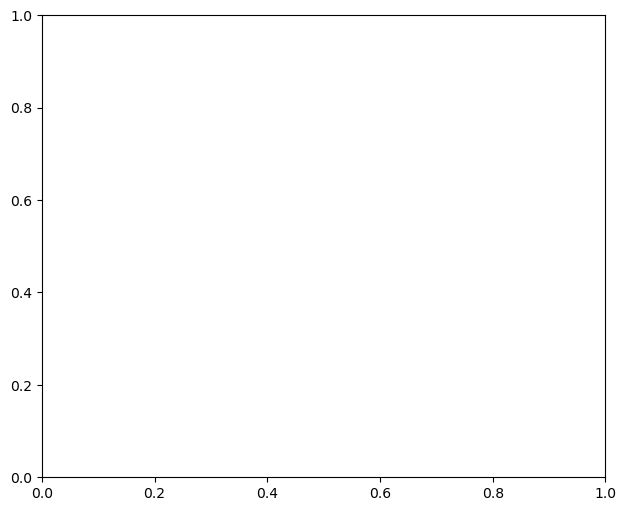

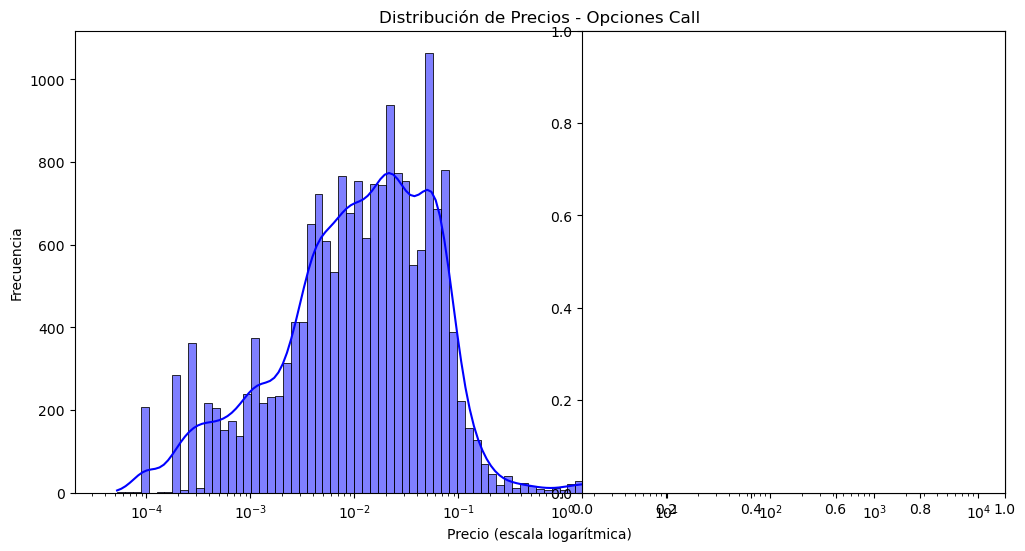

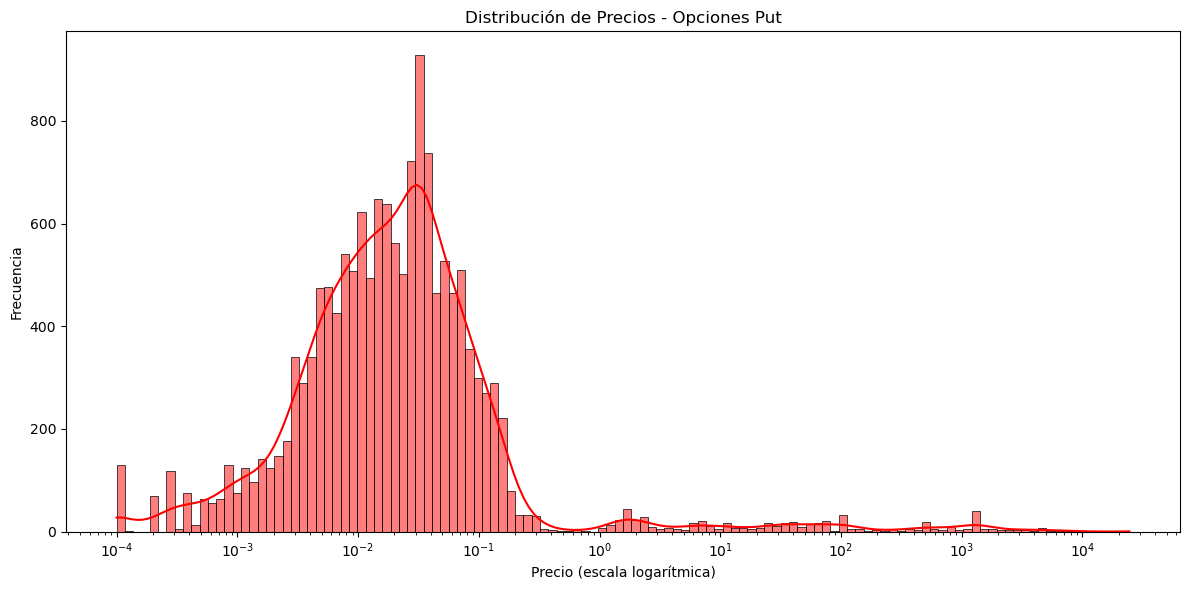

Estadísticas para Opciones Call:
count    18971.000000
mean         9.477470
std        167.447018
min          0.000000
25%          0.004000
50%          0.013500
75%          0.041890
max       7064.690272
Name: PRETRADEMARKPRICE, dtype: float64

Estadísticas para Opciones Put:
count    15074.000000
mean        20.029581
std        358.189704
min          0.000000
25%          0.006600
50%          0.019200
75%          0.047288
max      24439.828243
Name: PRETRADEMARKPRICE, dtype: float64

Prueba t para diferencia de medias:
t-statistic: nan
p-value: nan


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que df es tu DataFrame original
# Si no es así, carga tus datos primero:
# df = pd.read_csv('tu_archivo.csv')

# Separar los datos entre call y put
df_call = df[df['PUTCALL'] == 'C']
df_put = df[df['PUTCALL'] == 'P']

# Función para crear histograma con escala logarítmica
def plot_log_histogram(data, title, color):
    plt.figure(figsize=(12, 6))
    sns.histplot(data[data > 0], log_scale=True, kde=True, color=color)
    plt.title(title)
    plt.xlabel('Precio (escala logarítmica)')
    plt.ylabel('Frecuencia')

# Crear gráficos comparativos
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plot_log_histogram(df_call['PRETRADEMARKPRICE'], 'Distribución de Precios - Opciones Call', 'blue')

plt.subplot(1, 2, 2)
plot_log_histogram(df_put['PRETRADEMARKPRICE'], 'Distribución de Precios - Opciones Put', 'red')

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("Estadísticas para Opciones Call:")
print(df_call['PRETRADEMARKPRICE'].describe())
print("\nEstadísticas para Opciones Put:")
print(df_put['PRETRADEMARKPRICE'].describe())

# Comparación de medias
from scipy import stats

t_stat, p_value = stats.ttest_ind(df_call['PRETRADEMARKPRICE'], df_put['PRETRADEMARKPRICE'])
print(f"\nPrueba t para diferencia de medias:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

Análisis comparativo de las opciones Call y Put:

Forma de la distribución:

Tanto las opciones Call como las Put muestran una distribución sesgada hacia la derecha (positivamente sesgada) en escala logarítmica.
Ambas distribuciones tienen una forma similar a una distribución log-normal, lo cual es común en los precios de las opciones.


Rango de precios:

Ambos tipos de opciones cubren un rango amplio de precios, desde aproximadamente 10^-4 hasta 10^4.
La mayoría de los precios se concentran entre 10^-3 y 10^0 (0.001 a 1) para ambos tipos de opciones.


Concentración de precios:

Las opciones Call parecen tener una mayor concentración de precios en el rango de 10^-2 a 10^-1 (0.01 a 0.1).
Las opciones Put muestran una concentración ligeramente más alta en el rango de 10^-3 a 10^-2 (0.001 a 0.01).


Frecuencia máxima:

Las opciones Call alcanzan una frecuencia máxima de alrededor de 1100.
Las opciones Put tienen una frecuencia máxima ligeramente menor, alrededor de 900.


Cola de la distribución:

Ambas distribuciones muestran colas largas hacia la derecha, indicando la presencia de algunas opciones con precios muy altos.
La cola de las opciones Put parece ser ligeramente más pronunciada, sugiriendo más opciones Put con precios altos en comparación con las Call.


Multimodalidad:

La distribución de las opciones Put muestra una ligera multimodalidad, con pequeños picos secundarios en los rangos de precios más altos.
La distribución de las opciones Call parece más uniforme, sin picos secundarios evidentes.



Conclusiones:

Ambos tipos de opciones muestran características similares en términos de rango y distribución general de precios.
Las opciones Call parecen tener precios ligeramente más altos en promedio, con una mayor concentración en el rango medio.
Las opciones Put muestran una distribución más compleja, con más variabilidad en los precios altos.
La presencia de colas largas en ambas distribuciones sugiere que existen opciones de alto precio tanto para Call como para Put, posiblemente reflejando opciones in-the-money o con alta volatilidad implícita.

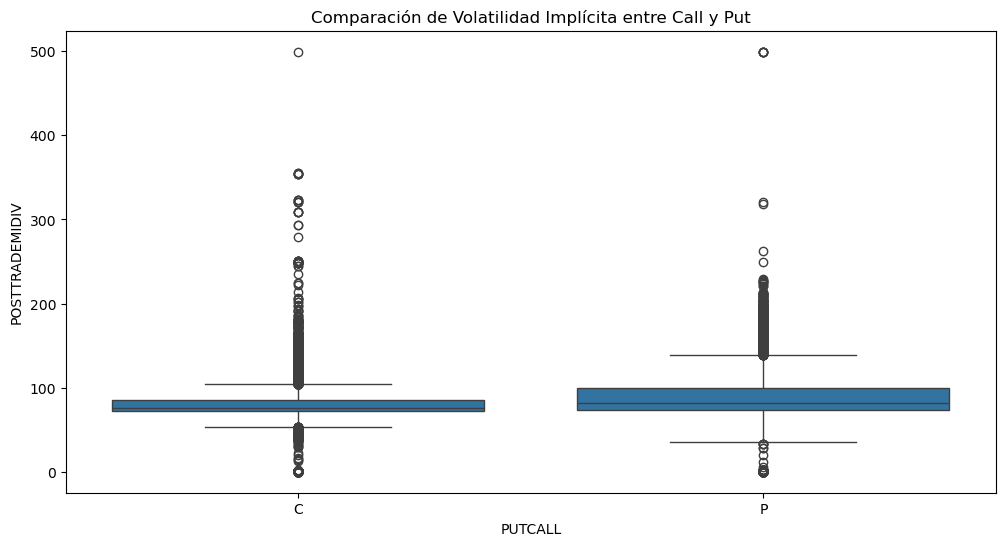

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='PUTCALL', y='POSTTRADEMIDIV', data=df)
plt.title('Comparación de Volatilidad Implícita entre Call y Put')
plt.show()

Esta gráfica de caja (boxplot) compara la volatilidad implícita (IV) entre las opciones Call (C) y Put (P). Aquí están las principales observaciones y análisis:

Mediana y rango intercuartílico:

La mediana de IV para las opciones Put es ligeramente más alta que para las Call.
El rango intercuartílico (la "caja" en el gráfico) es más grande para las Put, indicando una mayor dispersión en los valores de IV.


Valores atípicos:

Ambos tipos de opciones muestran numerosos valores atípicos (puntos por encima de los bigotes).
Los valores atípicos extremos alcanzan hasta cerca de 500% de IV para ambos tipos.


Simetría:

La distribución de IV para las Call parece ser más simétrica.
Las Put muestran una ligera asimetría hacia arriba (cola superior más larga).


Rango general:

El rango general de IV es similar para ambos tipos, pero las Put tienen un rango ligeramente más amplio.


Concentración:

La mayoría de los valores de IV para ambos tipos se concentran entre aproximadamente 50% y 100%.



Interpretación:

Sesgo de volatilidad: La ligera diferencia en la mediana y la mayor dispersión en las Put podrían indicar un "sesgo de volatilidad", donde las opciones Put tienden a tener una IV más alta. Esto es común en muchos mercados y refleja la demanda de protección contra caídas.
Expectativas del mercado: La similitud general en la distribución de IV sugiere que el mercado tiene expectativas de volatilidad similares para movimientos al alza y a la baja.
Valores extremos: Los valores atípicos altos en ambos tipos indican la presencia de opciones con expectativas de volatilidad muy altas, posiblemente reflejando eventos específicos o condiciones de mercado inusuales.
Liquidez y precio: La mayor dispersión en las Put podría indicar diferencias en la liquidez o en la precisión de los precios entre Call y Put.
Estrategias de trading: Esta información puede ser útil para estrategias de arbitraje de volatilidad o para identificar opciones potencialmente sobrevaloradas o infravaloradas.

Para profundizar en este análisis, podrías:

Examinar cómo varía la IV con respecto al precio de ejercicio (strike price).
Analizar la IV en función del tiempo hasta el vencimiento.
Investigar si hay patrones temporales en la IV (por ejemplo, variaciones durante el día o la semana).
Correlacionar la IV con otras métricas como el volumen de negociación o el interés abierto.

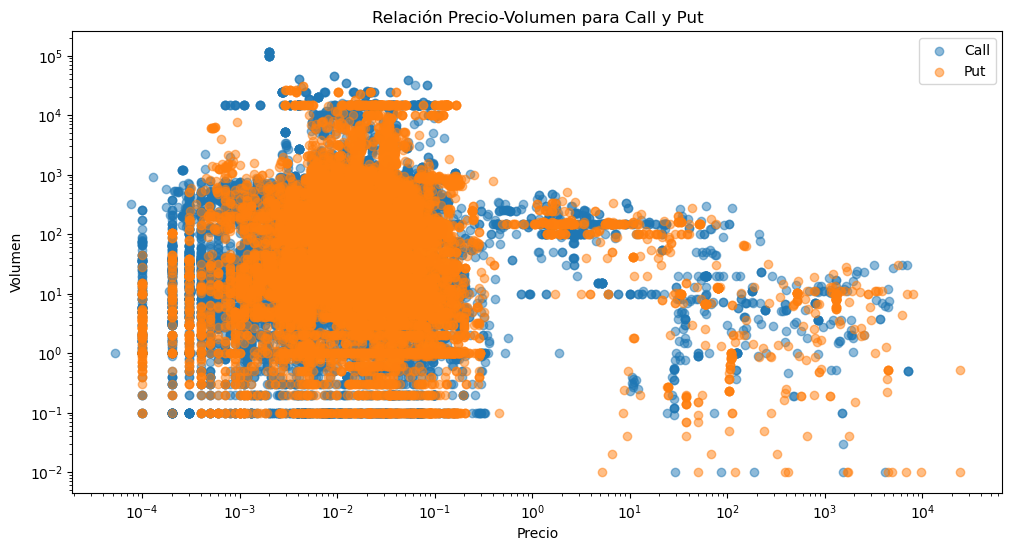

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(df_call['PRETRADEMARKPRICE'], df_call['PRETRADEBIDVOLUME'], alpha=0.5, label='Call')
plt.scatter(df_put['PRETRADEMARKPRICE'], df_put['PRETRADEBIDVOLUME'], alpha=0.5, label='Put')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Precio')
plt.ylabel('Volumen')
plt.legend()
plt.title('Relación Precio-Volumen para Call y Put')
plt.show()

Esta gráfica de dispersión muestra la relación entre el precio y el volumen para las opciones Call y Put. Aquí están las principales observaciones y análisis:

1. Distribución general:
   - Hay una alta concentración de puntos en el rango de precios entre 10^-3 y 10^0 (0.001 a 1).
   - El volumen varía ampliamente, desde menos de 1 hasta más de 10^5.

2. Diferencias entre Call y Put:
   - No hay una clara distinción visual entre Call y Put en términos de la relación precio-volumen.
   - Ambos tipos de opciones parecen seguir patrones similares.

3. Relación precio-volumen:
   - No se observa una relación lineal clara entre precio y volumen.
   - Hay una tendencia a tener volúmenes más altos en el rango de precios medio (entre 0.01 y 1).

4. Valores atípicos:
   - Existen algunos puntos con volúmenes muy altos (>10^4) distribuidos en varios niveles de precios.
   - Hay opciones con precios muy altos (>10^3) que tienden a tener volúmenes más bajos.

5. Clustering:
   - Se observan algunos clusters o agrupaciones, especialmente en ciertos niveles de precios.

6. Escala logarítmica:
   - El uso de escalas logarítmicas en ambos ejes permite visualizar un rango muy amplio de valores.

Interpretación y conclusiones:

1. Liquidez: La mayor concentración de puntos en el rango de precios medio sugiere que estas opciones son las más líquidas y activamente negociadas.

2. Opciones de alto precio: Las opciones con precios muy altos tienden a tener menos volumen, lo que podría indicar menor liquidez para estas opciones, posiblemente debido a su alto costo.

3. Similitud Call-Put: La falta de distinción clara entre Call y Put sugiere que el comportamiento del volumen en relación con el precio es similar para ambos tipos de opciones.

4. Volatilidad del volumen: La gran variación en el volumen para precios similares indica que otros factores además del precio influyen significativamente en el volumen de negociación.

5. Posible impacto de eventos: Los puntos con volúmenes extremadamente altos podrían representar eventos específicos del mercado o noticias que provocaron una actividad de trading inusualmente alta.

6. Estrategias de trading: La concentración de actividad en ciertos rangos de precios podría reflejar estrategias populares de trading o niveles psicológicamente importantes para los traders.

Para profundizar en este análisis, podrías:
- Examinar cómo varía esta relación para diferentes fechas de vencimiento.
- Investigar si hay patrones temporales en la relación precio-volumen.
- Analizar la relación entre el volumen y otras métricas como la volatilidad implícita o el interés abierto.
- Identificar y estudiar los casos de volumen extremadamente alto para entender qué factores los provocaron.

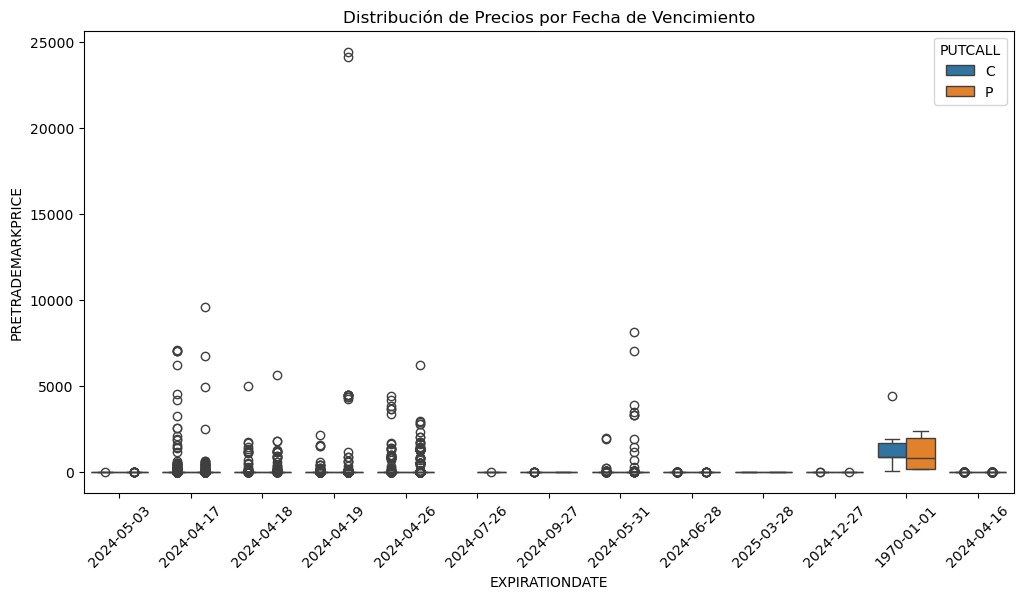

In [23]:
df['EXPIRATIONDATE'] = pd.to_datetime(df['EXPIRATIONTIMESTAMP']).dt.date
plt.figure(figsize=(12, 6))
sns.boxplot(x='EXPIRATIONDATE', y='PRETRADEMARKPRICE', hue='PUTCALL', data=df)
plt.xticks(rotation=45)
plt.title('Distribución de Precios por Fecha de Vencimiento')
plt.show()

Esta gráfica de caja (boxplot) muestra la distribución de precios de opciones Call (C) y Put (P) para diferentes fechas de vencimiento. Aquí están las principales observaciones y análisis:

Rango de fechas:

Las fechas de vencimiento van desde abril de 2024 hasta enero de 2970 (posiblemente un error de datos para la fecha más lejana).


Distribución de precios:

La mayoría de los precios se concentran en la parte inferior de la gráfica, con muchos valores atípicos hacia arriba.
Hay una gran variabilidad en los precios, con algunos valores extremadamente altos.


Comparación Call vs Put:

En general, no se observa una diferencia consistente entre los precios de Call y Put para la mayoría de las fechas.
Para la fecha "1970-01-01" (posiblemente otro error de datos), se ve una diferencia más notable, con las Put teniendo precios ligeramente más altos.


Valores atípicos:

Hay numerosos valores atípicos (puntos por encima de las cajas) para casi todas las fechas de vencimiento.
El valor atípico más alto se observa cerca de los 25,000, probablemente para opciones de vencimiento en abril de 2024.


Tendencias temporales:

No se observa una clara tendencia de aumento o disminución de precios a medida que las fechas de vencimiento se alejan.
Las fechas más cercanas (abril y mayo de 2024) muestran una mayor variabilidad y valores atípicos más altos.


Concentración de datos:

Hay más datos para las fechas de vencimiento más cercanas, como se evidencia por las cajas más definidas.



Interpretaciones y conclusiones:

Liquidez y actividad: Las fechas de vencimiento más cercanas parecen tener más actividad y liquidez, como se evidencia por la mayor cantidad de datos y variabilidad.
Precios extremos: Los valores atípicos altos podrían representar opciones deep in-the-money o con alta volatilidad implícita.
Similitud Call-Put: La falta de diferencias consistentes entre Call y Put sugiere que no hay un sesgo claro hacia un tipo de opción en términos de precios.
Errores de datos: Las fechas "1970-01-01" y "2970-01-01" probablemente son errores y deberían ser investigadas y posiblemente eliminadas del análisis.
Estructura temporal: La falta de una tendencia clara en los precios a lo largo del tiempo sugiere que otros factores (como el precio de ejercicio o la volatilidad del mercado) tienen un mayor impacto en los precios que el tiempo hasta el vencimiento.
Oportunidades de arbitraje: Las grandes diferencias en precios para la misma fecha de vencimiento podrían indicar posibles oportunidades de arbitraje, aunque se necesitaría más información sobre los precios de ejercicio y las condiciones del mercado.

Para mejorar este análisis, se podría:

Limpiar los datos para eliminar fechas erróneas.
Estratificar el análisis por precio de ejercicio.
Examinar la relación entre el tiempo hasta el vencimiento y la volatilidad implícita.
Investigar los casos de precios extremadamente altos para entender qué factores los provocaron.

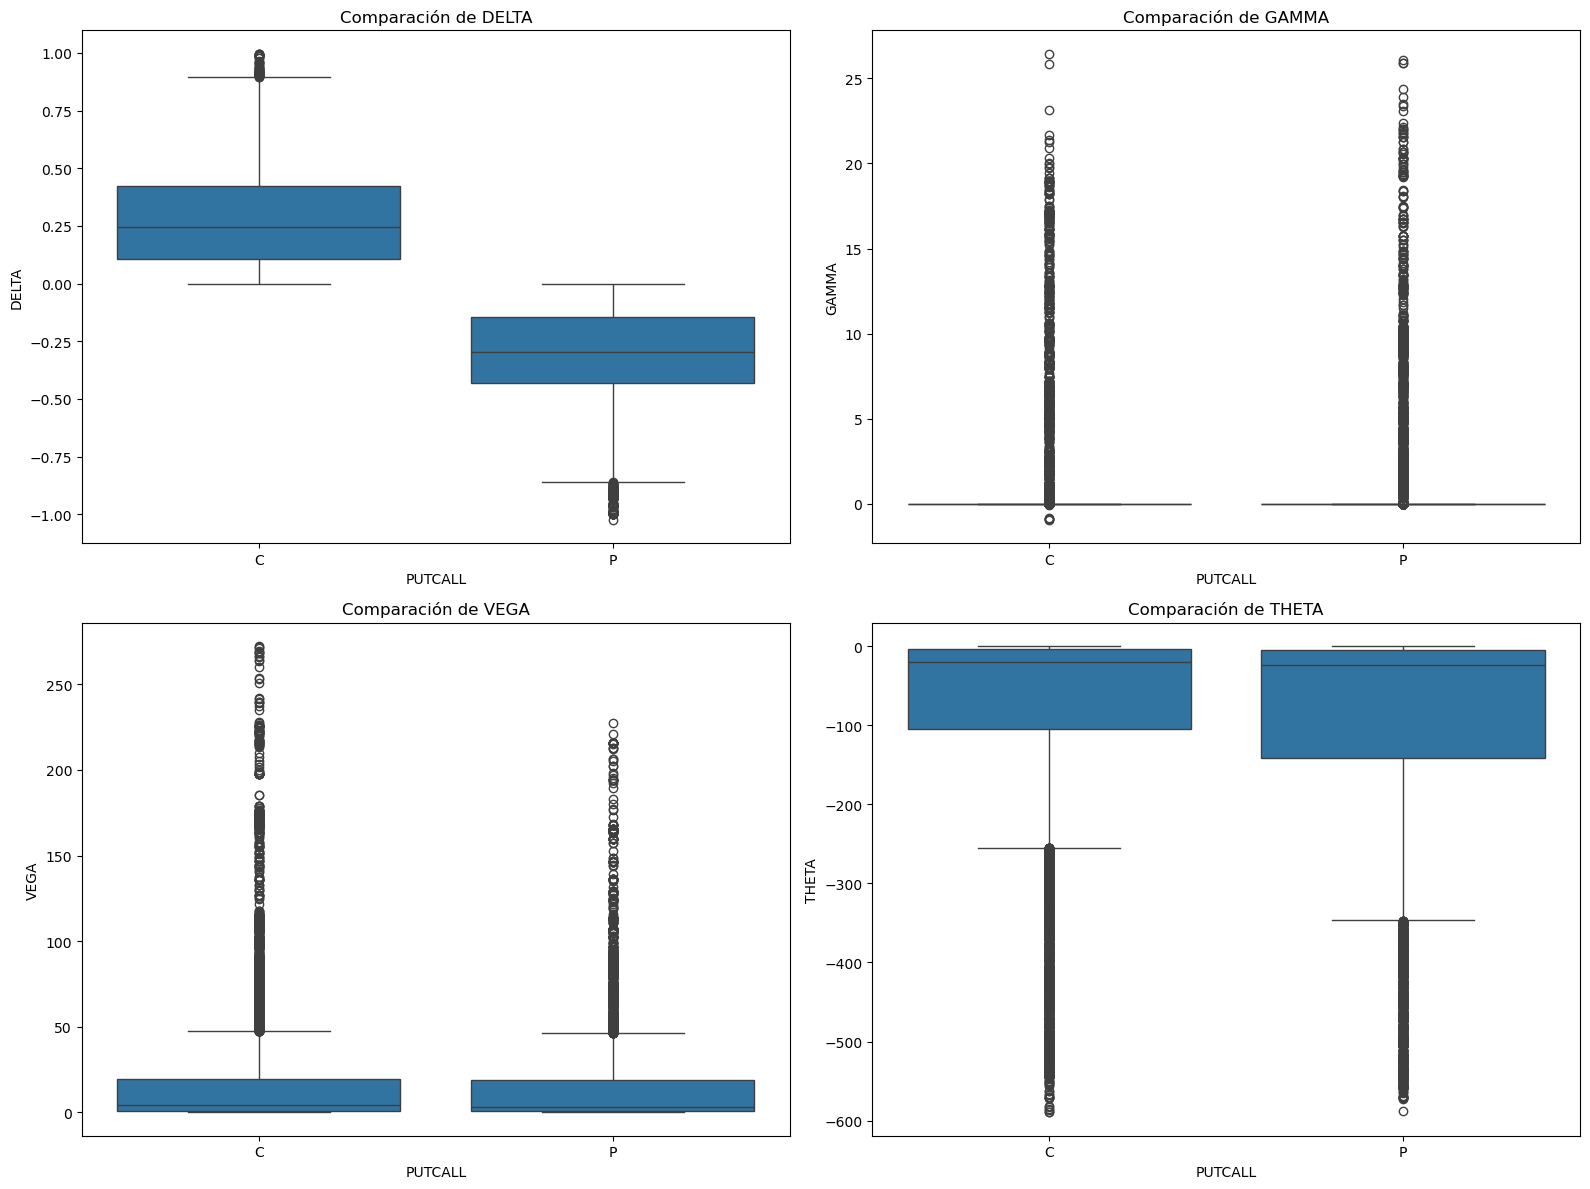

In [24]:
greek_columns = ['DELTA', 'GAMMA', 'VEGA', 'THETA']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
for i, greek in enumerate(greek_columns):
    sns.boxplot(x='PUTCALL', y=greek, data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Comparación de {greek}')
plt.tight_layout()
plt.show()

Esta serie de gráficos de caja (boxplots) compara las cuatro "griegas" principales (Delta, Gamma, Vega y Theta) entre opciones Call (C) y Put (P). Aquí está un análisis detallado de cada una:

Delta:

Call: Valores positivos, principalmente entre 0 y 0.5.
Put: Valores negativos, principalmente entre -0.5 y 0.
Esto es consistente con la teoría, ya que Delta de Call es positivo (aumenta con el precio del subyacente) y Delta de Put es negativo (disminuye con el precio del subyacente).


Gamma:

Similar para Call y Put, mayormente cercano a cero con valores atípicos altos.
Gamma siempre es positivo para ambos tipos de opciones, lo cual se refleja en el gráfico.
Los valores atípicos altos indican opciones cerca del dinero (at-the-money) o con vencimiento cercano.


Vega:

Distribución similar para Call y Put.
La mayoría de los valores están cerca de cero, con algunos valores atípicos altos.
Vega es siempre positivo, lo cual se observa en el gráfico.


Theta:

Principalmente negativo para ambos Call y Put, lo cual es consistente con la teoría (el valor de la opción disminuye con el tiempo).
Las Put parecen tener valores de Theta ligeramente más negativos en promedio.
Hay algunos valores atípicos muy negativos, posiblemente para opciones cerca del vencimiento.



Interpretaciones y conclusiones:

Las distribuciones de las griegas son consistentes con la teoría de opciones, lo que sugiere que los datos son confiables.
La simetría entre Call y Put en Gamma y Vega indica que estas griegas son independientes del tipo de opción, como se espera teóricamente.
Los valores atípicos en Gamma y Vega podrían representar opciones at-the-money o cerca del vencimiento, que son más sensibles a cambios en el precio del subyacente y la volatilidad.
La distribución de Delta muestra claramente la diferencia fundamental entre Call y Put en términos de su respuesta al movimiento del precio del subyacente.
Los valores de Theta más negativos para Put podrían indicar una mayor pérdida de valor temporal para estas opciones, posiblemente debido a diferencias en las expectativas del mercado o en la estructura de las opciones disponibles.

Para profundizar en este análisis, se podría:

Examinar cómo estas griegas varían con el tiempo hasta el vencimiento.
Analizar la relación entre las griegas y el precio de ejercicio relativo al precio del subyacente (moneyness).
Investigar cómo las griegas se correlacionan entre sí y con otras métricas como el volumen de negociación o la volatilidad implícita.
Considerar cómo estas distribuciones podrían informar estrategias de trading o gestión de riesgos.

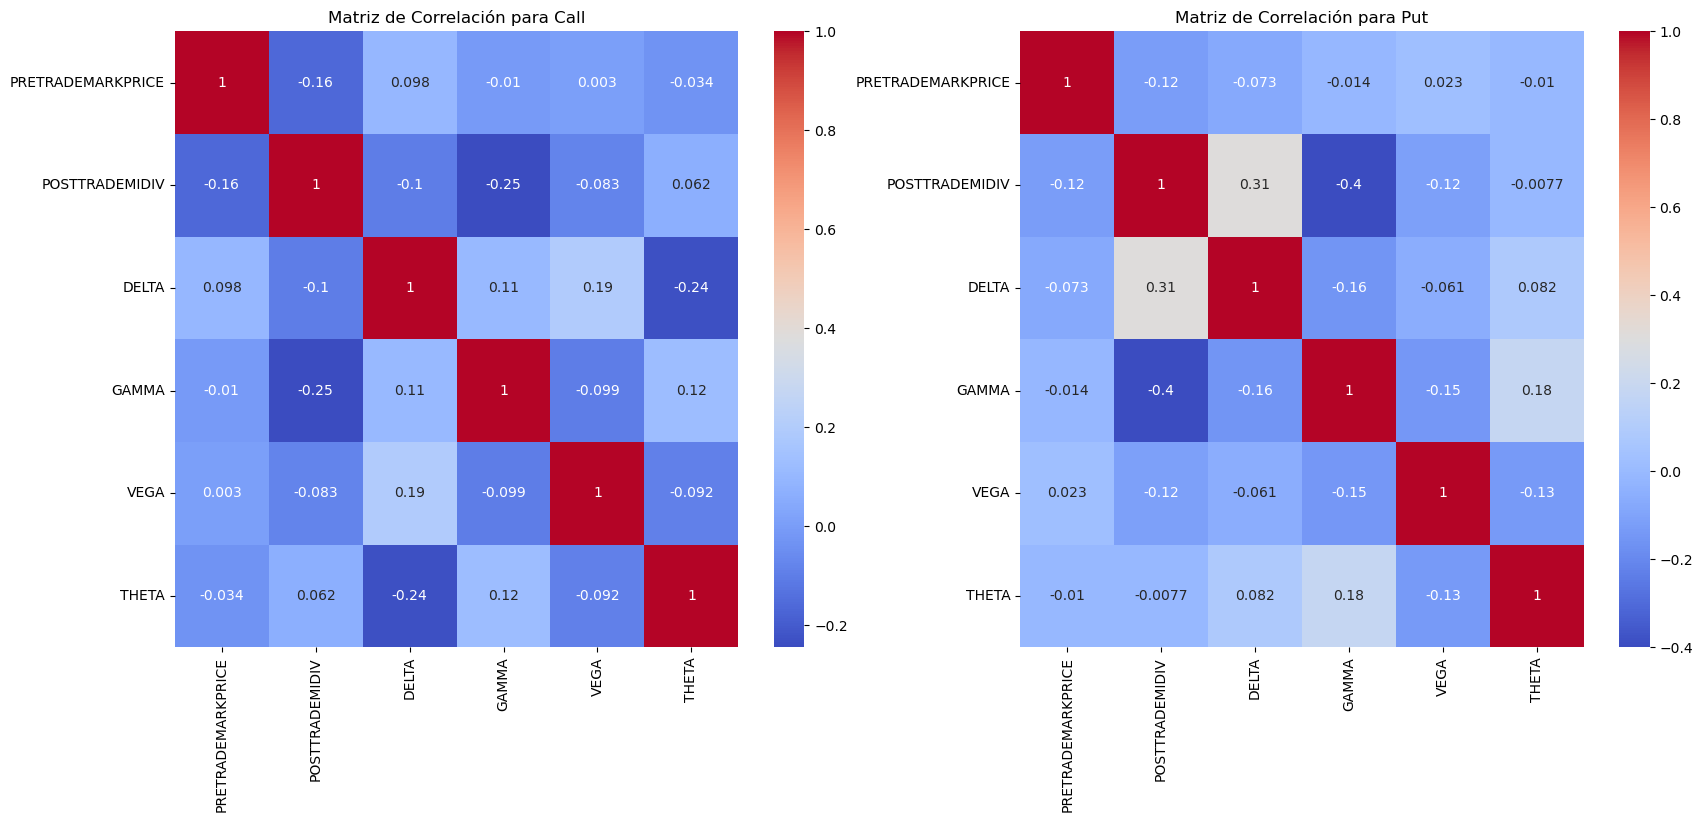

In [25]:
correlation_call = df_call[['PRETRADEMARKPRICE', 'POSTTRADEMIDIV', 'DELTA', 'GAMMA', 'VEGA', 'THETA']].corr()
correlation_put = df_put[['PRETRADEMARKPRICE', 'POSTTRADEMIDIV', 'DELTA', 'GAMMA', 'VEGA', 'THETA']].corr()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(correlation_call, annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title('Matriz de Correlación para Call')
sns.heatmap(correlation_put, annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('Matriz de Correlación para Put')
plt.show()

Estas matrices de correlación muestran las relaciones entre el precio de mercado pre-negociación (PRETRADEMARKPRICE), la volatilidad implícita post-negociación (POSTTRADEMIDIV) y las griegas (DELTA, GAMMA, VEGA, THETA) para opciones Call y Put. Aquí está un análisis detallado:

1. Comparación general Call vs Put:
   - Las correlaciones son generalmente similares entre Call y Put, con algunas diferencias notables.

2. PRETRADEMARKPRICE (Precio):
   - Call: Correlación positiva débil con DELTA (0.098)
   - Put: Correlación negativa débil con DELTA (-0.073)
   - Esto es consistente con la teoría de opciones: el precio de las Call aumenta con el precio del subyacente, mientras que el de las Put disminuye.

3. POSTTRADEMIDIV (Volatilidad implícita):
   - Correlación negativa débil con PRETRADEMARKPRICE para ambos (-0.16 para Call, -0.12 para Put)
   - Correlación positiva moderada con VEGA para ambos
   - Esto sugiere que opciones más caras tienden a tener menor volatilidad implícita, y que la volatilidad implícita está relacionada con la sensibilidad a cambios en la volatilidad (VEGA).

4. DELTA:
   - Call: Correlación positiva fuerte con GAMMA y VEGA
   - Put: Correlación negativa moderada con GAMMA y VEGA
   - Esta diferencia es notable y podría reflejar diferencias en cómo se comportan las opciones Call y Put en relación con el precio del subyacente.

5. GAMMA:
   - Correlación positiva fuerte con VEGA para ambos
   - Correlación negativa moderada con THETA para ambos
   - Esto es consistente con la teoría: opciones con alto GAMMA (cerca del dinero) tienden a tener alto VEGA y THETA más negativo.

6. VEGA:
   - Correlación negativa moderada con THETA para ambos
   - Esto es lógico, ya que opciones con alto VEGA (típicamente opciones de largo plazo) tienden a tener THETA menos negativo.

7. THETA:
   - Correlaciones generalmente más débiles con otras variables, excepto la mencionada con VEGA.

Conclusiones y observaciones:

1. Las relaciones entre las griegas son en gran medida consistentes con la teoría de opciones, lo que sugiere que los datos son confiables.

2. Las diferencias en las correlaciones entre Call y Put, especialmente para DELTA, reflejan las diferencias fundamentales en cómo estos tipos de opciones responden a los cambios en el precio del subyacente.

3. La relación entre volatilidad implícita (POSTTRADEMIDIV) y precio (PRETRADEMARKPRICE) sugiere que las opciones más caras tienden a tener menor volatilidad implícita, lo cual podría ser útil para estrategias de trading.

4. Las fuertes correlaciones entre GAMMA, VEGA y THETA subrayan la interconexión de estas griegas y la importancia de considerarlas en conjunto al evaluar opciones.

5. La relativa independencia de THETA con respecto a otras variables (excepto VEGA) sugiere que el decaimiento temporal de las opciones es un factor relativamente constante en diversos escenarios de mercado.

Estas observaciones pueden ser valiosas para la gestión de riesgos, la selección de estrategias de opciones y la comprensión de cómo diferentes factores interactúan en el pricing de opciones.

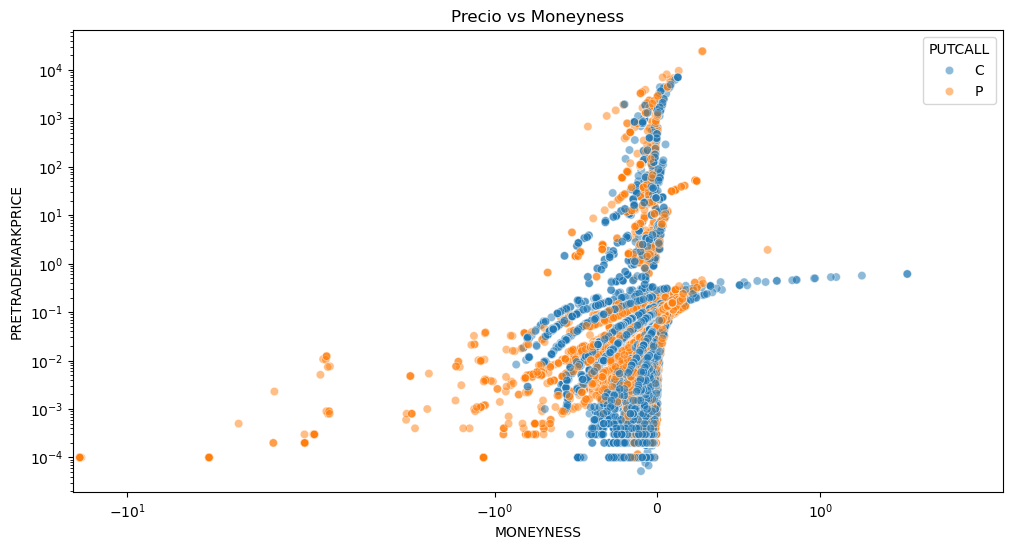

In [26]:
df['MONEYNESS'] = (df['INDEXPRICE'] - df['STRIKE']) / df['STRIKE']
df['MONEYNESS'] = df['MONEYNESS'] * df['PUTCALL'].map({'C': 1, 'P': -1})  # Invertir para Put

plt.figure(figsize=(12, 6))
sns.scatterplot(x='MONEYNESS', y='PRETRADEMARKPRICE', hue='PUTCALL', data=df, alpha=0.5)
plt.xscale('symlog')
plt.yscale('log')
plt.title('Precio vs Moneyness')
plt.show()

Esta gráfica muestra la relación entre el precio de las opciones (PRETRADEMARKPRICE) y su "moneyness" para opciones Call (C) y Put (P). Aquí está un análisis detallado:

1. Escala:
   - El eje Y (precio) está en escala logarítmica, abarcando desde 10^-4 hasta 10^4.
   - El eje X (moneyness) está en escala simétrica logarítmica, con valores desde aproximadamente -10 hasta poco más de 0.

2. Distribución general:
   - La mayoría de los puntos se concentran cerca del centro (moneyness cercano a 0), lo que representa opciones at-the-money o cerca del dinero.
   - Hay una clara forma de "sonrisa" o "smirk" en la distribución, típica en los mercados de opciones.

3. Opciones Call (azul):
   - Tienden a tener precios más altos a medida que el moneyness aumenta (se vuelven más in-the-money).
   - Forman una curva ascendente hacia la derecha del gráfico.

4. Opciones Put (naranja):
   - Tienden a tener precios más altos a medida que el moneyness disminuye (se vuelven más in-the-money).
   - Forman una curva ascendente hacia la izquierda del gráfico.

5. Simetría:
   - Hay una cierta simetría entre Call y Put, lo cual es consistente con la paridad put-call.
   - Sin embargo, la distribución no es perfectamente simétrica, lo que puede indicar diferentes expectativas del mercado para movimientos al alza vs. a la baja.

6. Opciones deep out-of-the-money:
   - Tanto para Call como para Put, hay opciones con precios muy bajos (cerca de 10^-4) que están muy fuera del dinero.
   - Estas opciones tienen muy poca probabilidad de terminar in-the-money, por lo que son muy baratas.

7. Opciones deep in-the-money:
   - Se observan opciones con precios muy altos (10^3 - 10^4) para valores de moneyness extremos en ambas direcciones.
   - Estas opciones tienen un alto valor intrínseco.

8. Volatilidad implícita:
   - La forma de "sonrisa" sugiere que las opciones out-of-the-money tienen una volatilidad implícita más alta que las at-the-money.
   - Esto es común en los mercados y se conoce como "volatility smile" o "volatility skew".

Conclusiones:

1. El mercado parece estar funcionando de manera eficiente, con los precios de las opciones reflejando su moneyness de manera coherente.
2. La presencia de un "skew" de volatilidad sugiere que el mercado asigna una mayor probabilidad a movimientos extremos de lo que sugeriría una distribución normal.
3. La ligera asimetría entre Call y Put podría indicar un sesgo en las expectativas del mercado sobre la dirección futura del activo subyacente.
4. La amplia gama de precios y moneyness sugiere un mercado de opciones líquido y diverso, ofreciendo muchas oportunidades para diferentes estrategias de trading e inversión.

Este gráfico proporciona una valiosa visión general de la estructura de precios del mercado de opciones y puede ser útil para identificar oportunidades de arbitraje o para diseñar estrategias de cobertura.